<a href="https://colab.research.google.com/github/FrancoiseArtignan/VDB_jupyter/blob/tp2_Francoise/AD_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Project: Analysis of music data from Spotify by ML**
M2 students in Bioinformatics

Pierre BERTRAND p2007051

Kuan-Hua TU p1311354

# **Introduction**


## **Hypotheses**

*We are trying to find out if it is possible to predict the genre and popularity of the music from the set of characteristics of the tracks.*

First, a learning by decision tree was made. Decision tree learning is a discrete-valued target function approximation method. For this, a quantitative measurement of the value of an attribute is carried out to determine the best possible hypothesis to describe the target function.

Next, we want to know if the grouped documents "behave the same with respect to relevance to information needs". In terms of classification, it indicates that if the points are in the same cluster, they are likely to be of the same class. There can be multiple clusters forming a single class.

## **Dataset**
Here, our dataset comes from Spotify, it gathers characteristics as well as the genre of 50,000 songs available in this application. We therefore first want to explore the data in order to better understand them, before clustering them and predicting the genres of music based on their characteristics.

Before analyzing the music data, we need to know the definitions of our different variables.
* **duration_ms**: The duration of the track in milliseconds.
* **key**: An estimated overall metric of a music track. Integers correspond to pitches using standard pitch class notation. (You can also give numeric values for the keys, e.g. 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.)
* **mode**: A mode indicates the modality of a track, major or minor. This is the type of scale from which its melodic content derives. (we can also write: the major is represented by 1 and the minor by 0.)
* **acousticness**: A measure of confidence from 0.0 to 1.0 indicating whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.
* **danceability**: Danceability describes how well a track is suited for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall evenness . A value of 0.0 is the least danceable and 1.0 is the most danceable.
* **energy**: A measure of 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, high-energy tracks are fast, loud, and loud. For example, death metal has high energy.
* **instrumentalness**: An indication of whether a track contains no vocals. The sounds "Ooh" and "aah" are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentality value is to 1.0, the more likely the track is to contain no vocal content. Values greater than 0.5 are intended to represent instrumental tracks, but the confidence is higher when the value approaches 1.0.
* **liveness**: Detection of the presence of an audience in the recording. Higher liveness values represent a likelihood that music was performed live.
* **loudness**: An overall sound level is a track in decibels (dB). Intensity values are averaged over the entire track and are useful for comparing the relative intensity of tracks. Loudness is the quality of a sound that is the main psychological correlate of physical strength (Typical values are between -60 and 0 db).
* **speechiness**: A detection on the presence of spoken words in a track. The more exclusively speech-like the recording (eg, talk show, audiobook, poetry), the closer the attribute value is to 1.0. Values above 0.66 describe tracks that are probably composed entirely of spoken words. Values between 0.33 and 0.66 describe tracks that can contain both music and speech, for example rap. Values below 0.33 most likely represent music.
* **valence**: It is a measure from 0.0 to 1.0 to describe the musical positivity conveyed by a piece. Tracks with a high valence are more positive, for example it is more joyful, cheerful. In contrast, tracks with low valence play more negatively, such as sad, depressed, or angry music.
* **tempo**: In music, tempo is the speed at which music is played. It is a regular beat that serves as a standard to build the different rhythmic values. The tempos are spaced two beats per minute at low cadences (from 30 to 60), then three (from 60 to 72), four (from 72 to 120), six (from 120 to 144), eight ( from 144 to 240) and finally twelve (from 240 to 252).


In [ ]:
!pip install tree

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib
%matplotlib inline

In [ ]:
#data=pd.read_csv("/content/drive/MyDrive/Projet_AD/music_genre.csv") #Francoise
data=pd.read_csv("/content/drive/MyDrive/Lyon 1/M2 : BMMA/AD/Projet_AD/music_genre.csv") #Pierre

# **Method and Analysis**

## Data cleaning
A data in the "tempo" column has an unknown character, we decide to delete it provided that it does not influence the analysis. For the "duration_ms" column, we filter on the positive duration. We also examine whether there are gaps in the data. Then we can see data behaviors by *data.describe()* (quantitative data) and *data.info()* (data types).

In [ ]:
data['tempo'] = data['tempo'].replace('?', np.nan)
data['tempo'] = pd.to_numeric(data['tempo'],errors="coerce")
data = data.dropna(axis=0, subset=['tempo'])
data = data[data['duration_ms'] > 0.0]
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.000000,40560.000000,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,55874.826430,44.276677,0.305974,0.558418,2.454895e+05,0.600330,0.181603,0.193820,-9.126369,0.093738,119.874523,0.456921
std,20731.018576,15.545617,0.341108,0.178652,1.101214e+05,0.264501,0.325710,0.161501,6.154679,0.101502,30.653215,0.246942
min,20002.000000,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,37994.750000,34.000000,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,0.259000
50%,55899.500000,45.000000,0.144000,0.569000,2.275330e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,0.449000
75%,73817.500000,56.000000,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344000,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [ ]:
data.isnull().sum() # il n'y a pas des valeurs manquantes

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 1 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40560 non-null  float64
 1   artist_name       40560 non-null  object 
 2   track_name        40560 non-null  object 
 3   popularity        40560 non-null  float64
 4   acousticness      40560 non-null  float64
 5   danceability      40560 non-null  float64
 6   duration_ms       40560 non-null  float64
 7   energy            40560 non-null  float64
 8   instrumentalness  40560 non-null  float64
 9   key               40560 non-null  object 
 10  liveness          40560 non-null  float64
 11  loudness          40560 non-null  float64
 12  mode              40560 non-null  object 
 13  speechiness       40560 non-null  float64
 14  tempo             40560 non-null  float64
 15  obtained_date     40560 non-null  object 
 16  valence           40560 non-null  float6

Par la fonction describe() et info(), nous pouvons voir les données quantitatives et qualitatives.
On utilise aussi le Pairplot pour trouver la relation entre elles où les variables peuvent être continues ou catégorielles. On va pas seulement savoir la moyenne ou la mediane, pour predire un ensemble de données faisant le machine learning, il nous faut tracer la distribution pour connaitre les données. Apres, on va discuter les données plus profondement.

In [ ]:
music = data[['music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()

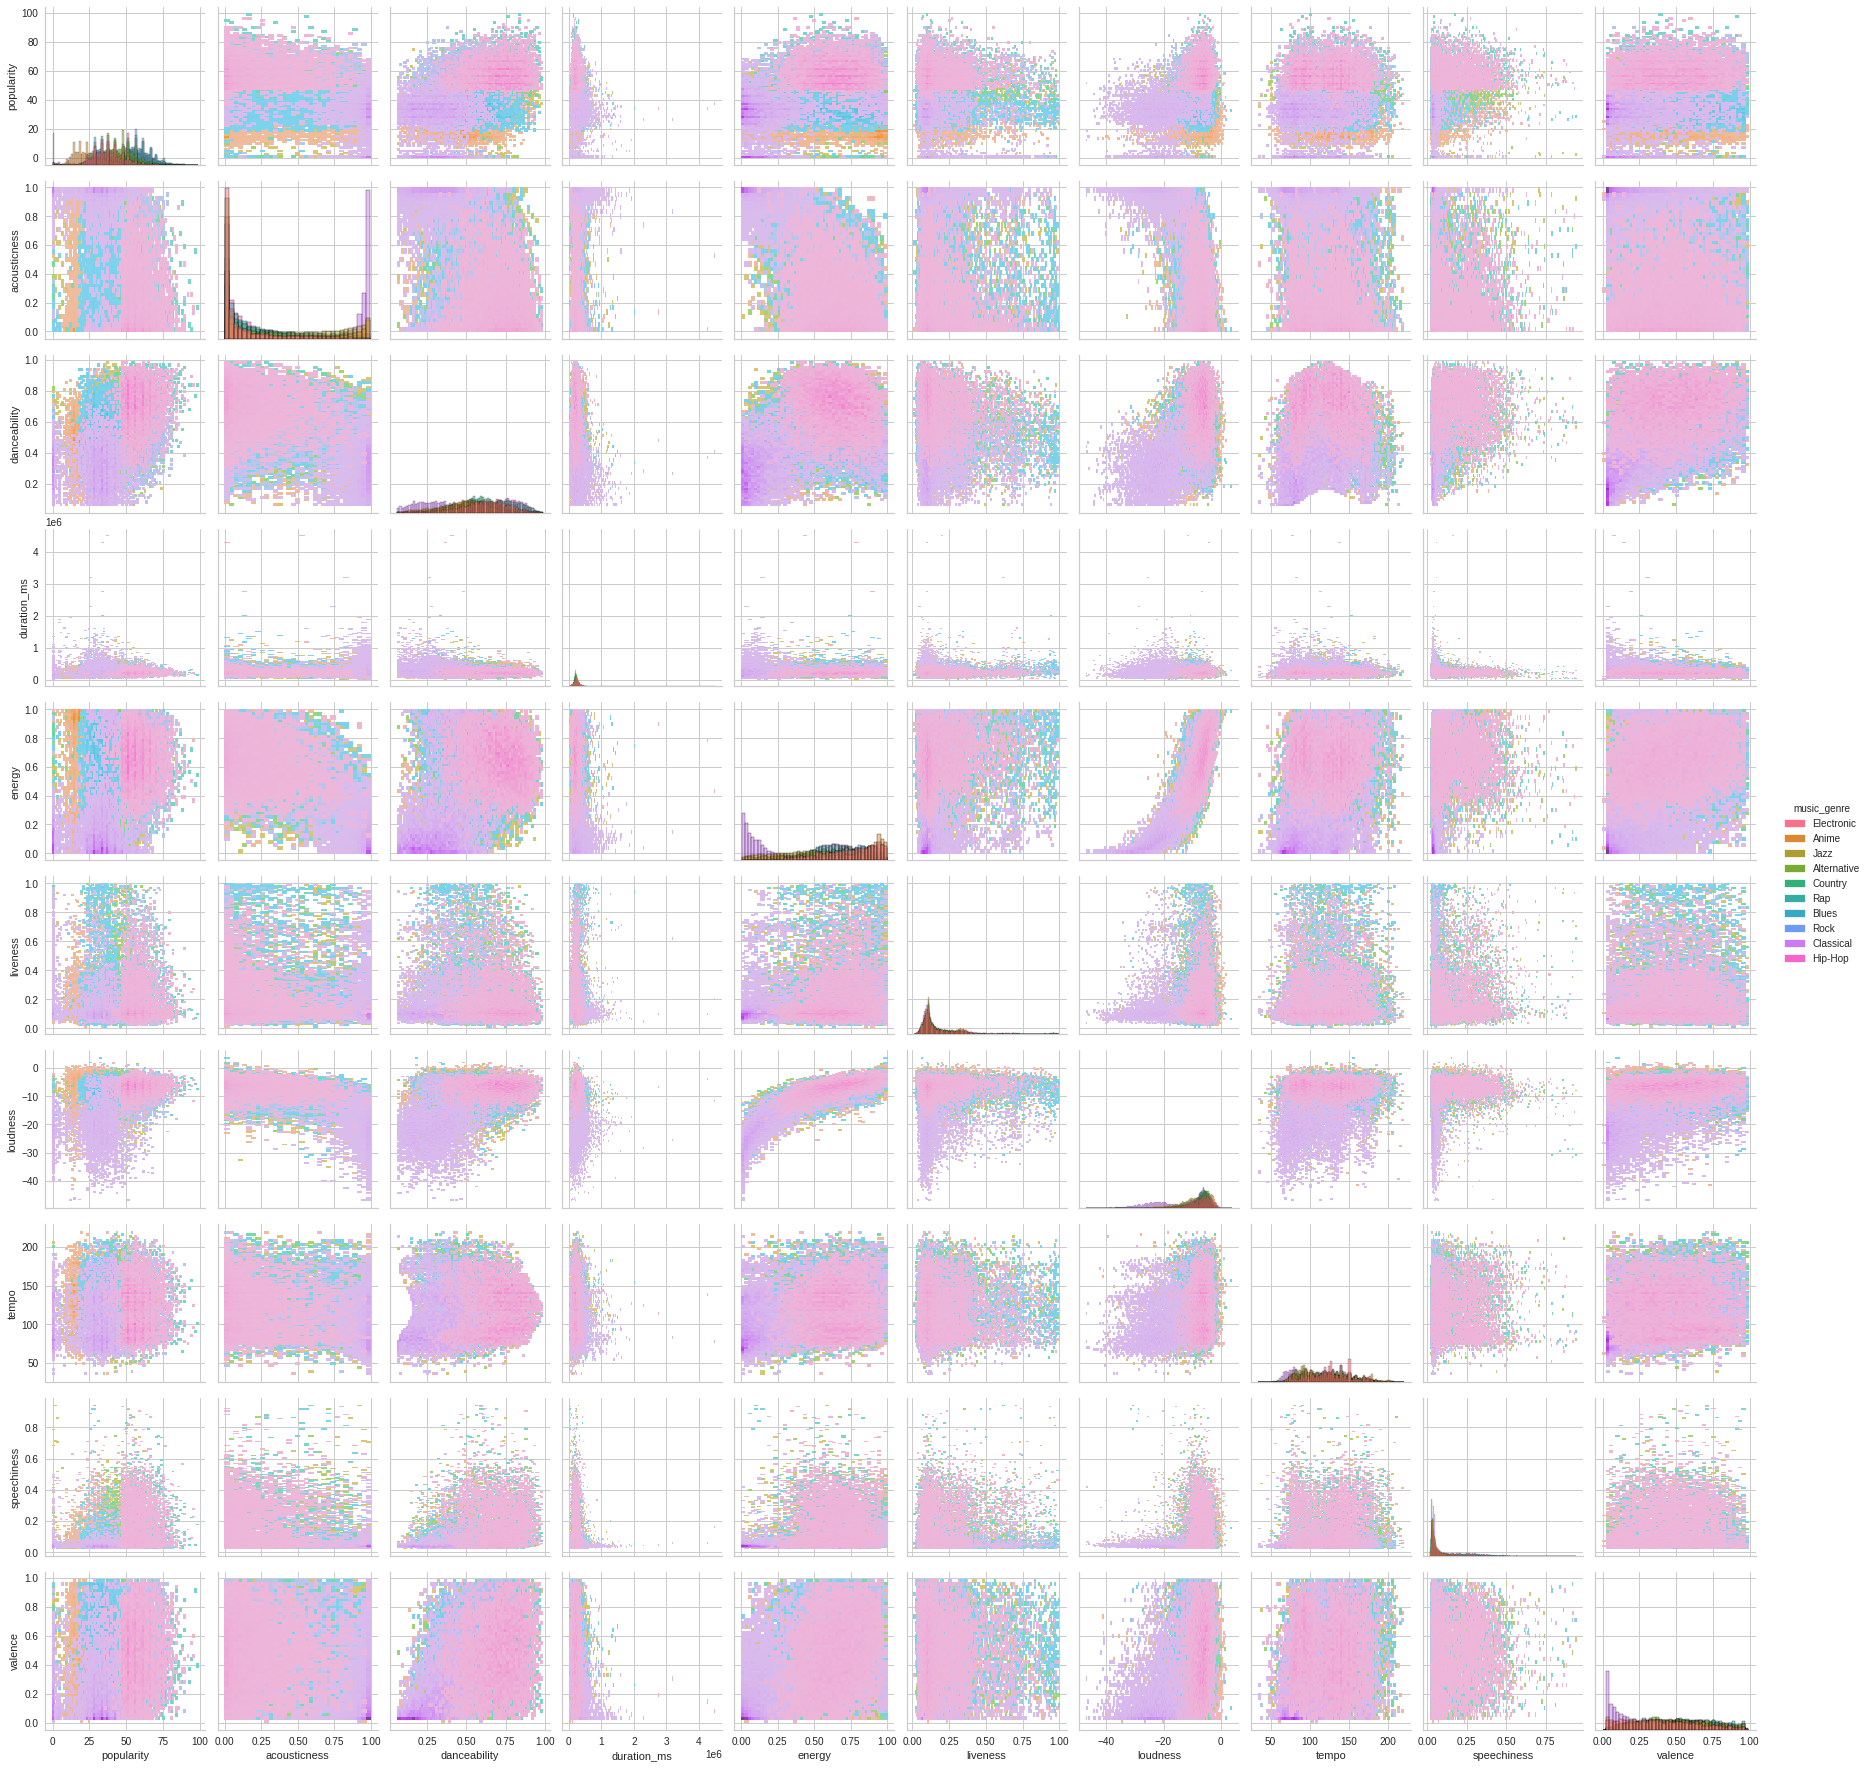

In [ ]:
sns.pairplot(music,kind="hist",hue="music_genre")

## The most popular music
Here we want to know the behavior of the most popular music.

In [ ]:
music_popularity = data[['artist_name','track_name','music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()

In [ ]:
music_popularity.sort_values(by=['popularity'], inplace=True,ascending=False)
music_popularity[:10]

,artist_name,track_name,music_genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,tempo,speechiness,valence
26239,Post Malone,Wow.,Rap,99.0,0.16300,0.833,149520.0,0.539,0.1010,-7.399,99.947,0.1780,0.385
25194,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Rap,97.0,0.55600,0.760,158040.0,0.479,0.0703,-5.574,89.911,0.0466,0.913
47024,J. Cole,MIDDLE CHILD,Hip-Hop,96.0,0.14900,0.837,213594.0,0.364,0.2710,-11.713,123.984,0.2760,0.463
105,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",Electronic,96.0,0.15300,0.841,212500.0,0.798,0.0618,-4.206,95.948,0.2290,0.591
48249,Meek Mill,Going Bad (feat. Drake),Hip-Hop,95.0,0.25900,0.889,180522.0,0.496,0.2520,-6.365,86.003,0.0905,0.544
28537,Travis Scott,SICKO MODE,Rap,94.0,0.00513,0.834,312820.0,0.730,0.1240,-3.714,155.008,0.2220,0.446
29974,21 Savage,a lot,Rap,93.0,0.03950,0.837,288624.0,0.636,0.3420,-7.643,145.972,0.0860,0.274
28055,Post Malone,Better Now,Rap,93.0,0.35400,0.680,231267.0,0.563,0.1360,-5.843,145.028,0.0454,0.374
48850,XXXTENTACION,SAD!,Hip-Hop,92.0,0.25800,0.740,166606.0,0.613,0.1230,-4.880,75.023,0.1450,0.473
46649,XXXTENTACION,Jocelyn Flores,Hip-Hop,90.0,0.46900,0.872,119133.0,0.391,0.2970,-9.144,134.021,0.2420,0.437


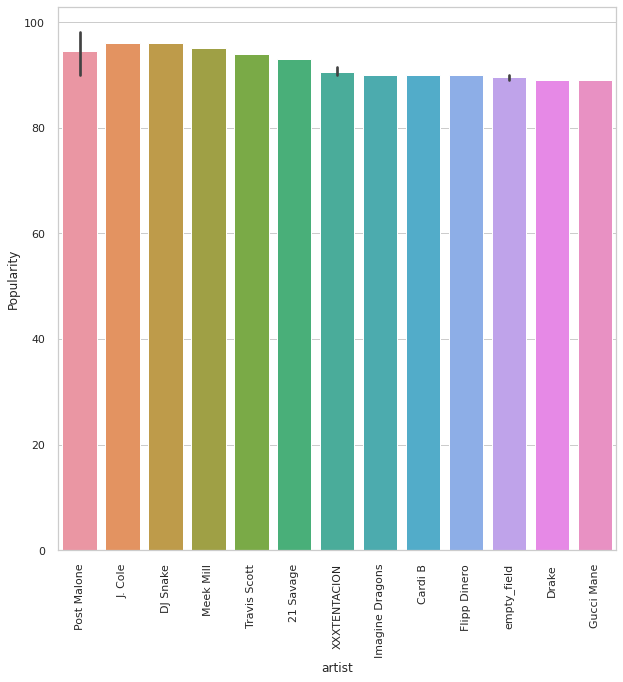

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
axis = sns.barplot(x=music_popularity['artist_name'][:20], y=music_popularity['popularity'])

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')
axis.tick_params(axis='x', rotation=90)

Rock           4099
Hip-Hop        4077
Jazz           4064
Anime          4064
Alternative    4051
Country        4049
Blues          4046
Rap            4042
Classical      4036
Electronic     4032
Name: music_genre, dtype: int64


Text(0.5, 1.0, 'Top genres')

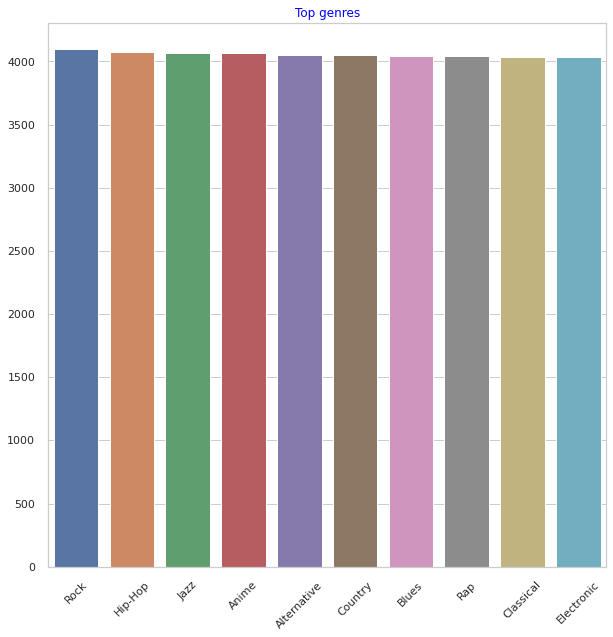

In [ ]:
top = music_popularity['music_genre'].value_counts()
print(top)
plt.figure(figsize=(10,10))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

The music genre field is very useful or significant in the dataset, so we need to address it. However, the distribution of the data by the different genres is very balanced, this indicates that the dataset has been made by hand, in order to give an equivalent force to each class. In all of the music contained in Spotify, we doubt that the genres are so balanced, since there are modes and preferences largely acquired by users.

## Principal Component Analysis (PCA, ACP in French)
PCA is a dimensionality reduction approach to try to find the best possible subspace explaining most of the variance in the data. It works by deriving components from the original scaled features. 

In [ ]:
music_pca = data[['popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()
music_pca.shape

(40560, 10)

In [ ]:
X=music_pca.values #on recupere les valeurs
labels = range(0,40561) #on fait une liste du meme nombre de cellule que l'on a de lignes dans nos données

### Standardisation

In [ ]:
SS=StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X) #jeu de donnée standardisé

In [ ]:
pca =PCA(n_components=2) #nous voulons seulement deux axes car plus simple de travailler dans un espace en 2D
pca.fit(Xnorm)
pca.explained_variance_ratio_ #variances expliquées des axes

array([0.33695309, 0.13477538])

- At this stage we can see that the PCA has created two axes, the first explains 33.6% of the variance of the dataset and the second explains 13.4%.
- The two combined represent 47% of the variances.


### Distribution

In [ ]:
Xpca = pca.transform(Xnorm)
Xpca.shape

(40560, 2)

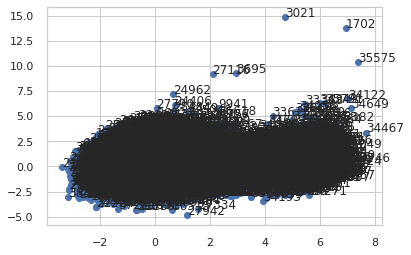

In [ ]:
plt.scatter(Xpca[:, 0], Xpca[:, 1])
for label, x, y in zip(labels, Xpca[:, 0], Xpca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
print(music_pca.columns.tolist())
print(pca.components_[0,:]) #represente la force des variables sur le premier axe
print(pca.components_[1,:]) #represente la force des variables sur le deuxieme axe

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'liveness', 'loudness', 'tempo', 'speechiness', 'valence']
[-0.25142336  0.45474235 -0.32021517  0.13521555 -0.47247337 -0.08746456
 -0.47852761 -0.16916319 -0.18021255 -0.29700527]
[-0.36656822 -0.20358816 -0.4847301   0.36226487  0.29077992  0.34055795
  0.16554659  0.34766243 -0.28374301 -0.16930117]


**Interpretation of axes:**

First axis:
- positive (right) influenced by the 'acousticness' variable: the more the track is to the right, the higher its acousticness value
- negative (left) influenced by the 'energy' and 'loudness' variables: the more the title is to the left, the higher it has values in its two variables

Second axis:
- positive (high) influenced by the 'duration_ms', 'liveness' and 'tempo' variables: the higher the title, the higher its variables.
- negative (low) influenced by the 'danceability' and 'popularity' variables: the lower the title, the higher it has values in its two variables

### Circle of correlations

Text(0.5, 1.0, 'Circle of Correlations')

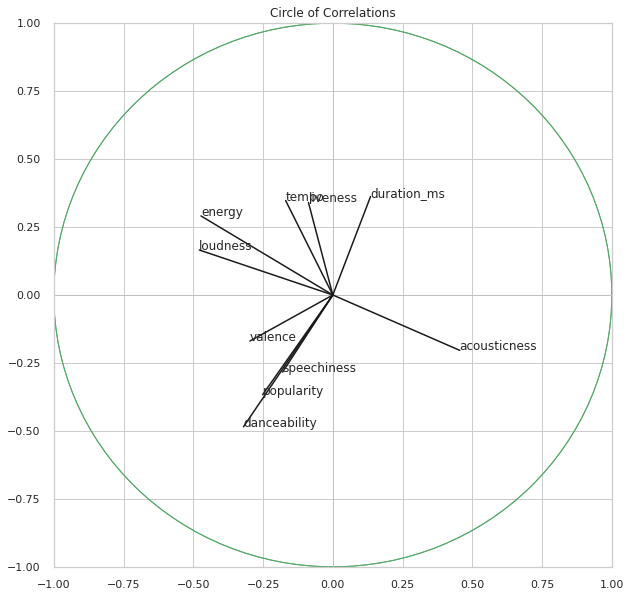

In [ ]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]
pc_infos = pd.DataFrame(coef, columns=cols, index=music_pca.columns)
pc_infos

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")

Here, the circle of correlation also informs us about the possible correlations between the variables. The most interesting are the variables correlated with popularity. We note that 'speechiness' and 'danceability' are the variables most positively correlated with 'popularity'. This means that the easier a song is to dance and sing, the more likely it is to become popular. Moreover, we notice that the valence is a rather correlated criterion. It's about sound positivity, so we can hypothesize that happy sounds are generally more popular.

It is also very interesting to look at the variables inversely correlated to popularity. Here, the duration seems inversely proportional, so the shorter the music, the more likely it is to be popular. Also the values of 'tempo' and 'liveness' should be lower in order to increase the value of 'popularity'.

## Data Mining

In [ ]:
music_type = data[['music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()
music_type.groupby("music_genre").agg(['mean',"count"])

popularity       acousticness       danceability        \
                  mean count         mean count         mean count   
music_genre                                                          
Alternative  50.238213  4051     0.165818  4051     0.543548  4051   
Anime        24.273130  4064     0.283650  4064     0.471435  4064   
Blues        34.844785  4046     0.312226  4046     0.527317  4046   
Classical    29.305253  4036     0.870412  4036     0.306723  4036   
Country      46.026920  4049     0.271384  4049     0.576436  4049   
Electronic   38.264137  4032     0.124051  4032     0.620173  4032   
Hip-Hop      58.397842  4077     0.178435  4077     0.716462  4077   
Jazz         40.967766  4064     0.494101  4064     0.584422  4064   
Rap          60.589560  4042     0.171080  4042     0.696837  4042   
Rock         59.603562  4099     0.191159  4099     0.539868  4099   

               duration_ms          energy        liveness         loudness  \
                      mean count      mean count      mean count       mean   
music_genre                                                                   
Alternative  233401.847692  4051  0.711347  4051  0.196118  4051  -6.526353   
Anime        231378.483760  4064  0.667528  4064  0.193509  4064  -7.910208   
Blues        253432.844291  4046  0.612521  4046  0.233495  4046  -8.949297   
Classical    310510.827552  4036  0.175664  4036  0.162306  4036 -21.629532   
Country      216708.237837  4049  0.636880  4049  0.185417  4049  -7.323265   
Electronic   269823.285714  4032  0.738062  4032  0.210307  4032  -7.072186   
Hip-Hop      219770.169733  4077  0.647242  4077  0.201357  4077  -6.821617   
Jazz         264350.728593  4064  0.473662  4064  0.172591  4064 -11.182938   
Rap          219015.521524  4042  0.650704  4042  0.197174  4042  -6.668378   
Rock         237044.896072  4099  0.687760  4099  0.186050  4099  -7.244407   

                        tempo       speechiness         valence        
            count        mean count        mean count      mean count  
music_genre                                                            
Alternative  4051  122.398718  4051    0.088907  4051  0.448641  4051  
Anime        4064  126.688628  4064    0.064674  4064  0.436103  4064  
Blues        4046  121.296835  4046    0.062552  4046  0.577852  4046  
Classical    4036  103.916934  4036    0.051597  4036  0.210925  4036  
Country      4049  123.976519  4049    0.049078  4049  0.537257  4049  
Electronic   4032  125.775481  4032    0.099289  4032  0.391775  4032  
Hip-Hop      4077  119.900795  4077    0.206740  4077  0.476371  4077  
Jazz         4064  111.613436  4064    0.073962  4064  0.507923  4064  
Rap          4042  120.428165  4042    0.187059  4042  0.456343  4042  
Rock         4099  122.694381  4099    0.053446  4099  0.523973  4099

We can see that some genders can differ from others on certain characteristics. For example classical music has a very high Acousticness (0.87), a very low energy (0.17) and a very low loudness (-21). While the other genres average an acousticness around 0.25, an energy around 0.6 and a loudness of -7. We can therefore predict that the Classical genre will be more easily predicted/classified by the algorithms.
We also see that the characteristics of Hip-Hop and Rap are very similar, so we expect to predict them together or unite in the same class.

### Heatmap

A heat map can also be used to show correlations between variables. The figure is corresponding to the PCA result. Popularity is more correlated with danceability, loundness and speechiness.

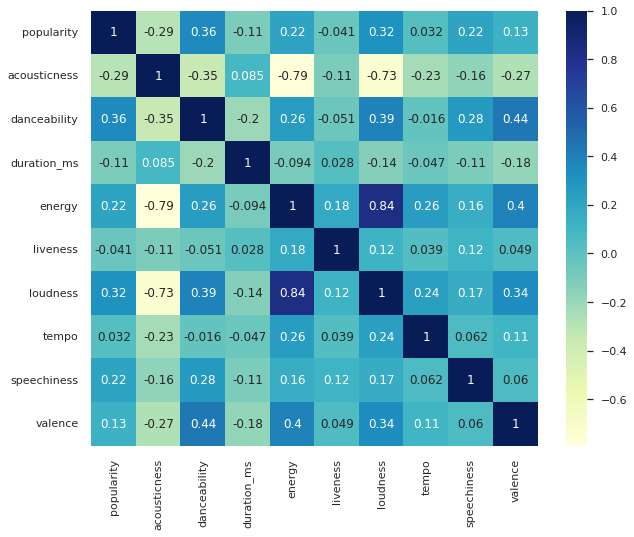

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
corr = music_pca.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

## Prediction algorithms

### Linear regression


After dividing the dataset into dependent and independent variables, we need to divide X and Y into training and testing sets.
The split is 75% for training and 25% for testing.

Here we will try to predict the popularity of music from its characteristics. To predict a quantitative variable we can use a linear regression.

In [ ]:
x = music_popularity[['acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()
y = music_popularity['popularity']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30420, 9)
(30420,)
(10140, 9)
(10140,)


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_prediction = linear_reg.predict(x_test)
y_prediction.shape

(10140,)

In [ ]:
print('le MAE :', metrics.mean_absolute_error(y_test, y_prediction))
print('le MSE :', metrics.mean_squared_error(y_test,y_prediction))
print('le RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print('r2 :', metrics.r2_score(y_test, y_prediction))

le MAE : 11.091975896685964
le MSE : 195.7606839580879
le RMSE : 13.991450387936482
r2 : 0.19393099594157548


Looking at the results of r2 as shown above, we can say that linear regression performance is poor with an r2 of 19%.

In another time, we can use the decision tree algorithm to predict music genres from their characteristics. So we use the classification algorithm because we want to predict a qualitative variable.

### Decision Tree

It is more appropriate here to seek to predict gender with a classifier. Decision trees are well suited to this task.

In [ ]:
num_with_genre = data[['music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']]
target = num_with_genre["music_genre"]
numerical = num_with_genre.drop(columns=["music_genre"])

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(numerical,target)

In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=20,min_samples_leaf=2000)
dt.fit(Xtrain,Ytrain)

Y_predicted=dt.predict(Xtest)
Y_predicted

array(['Rock', 'Jazz', 'Country', ..., 'Rock', 'Rock', 'Blues'],
      dtype=object)

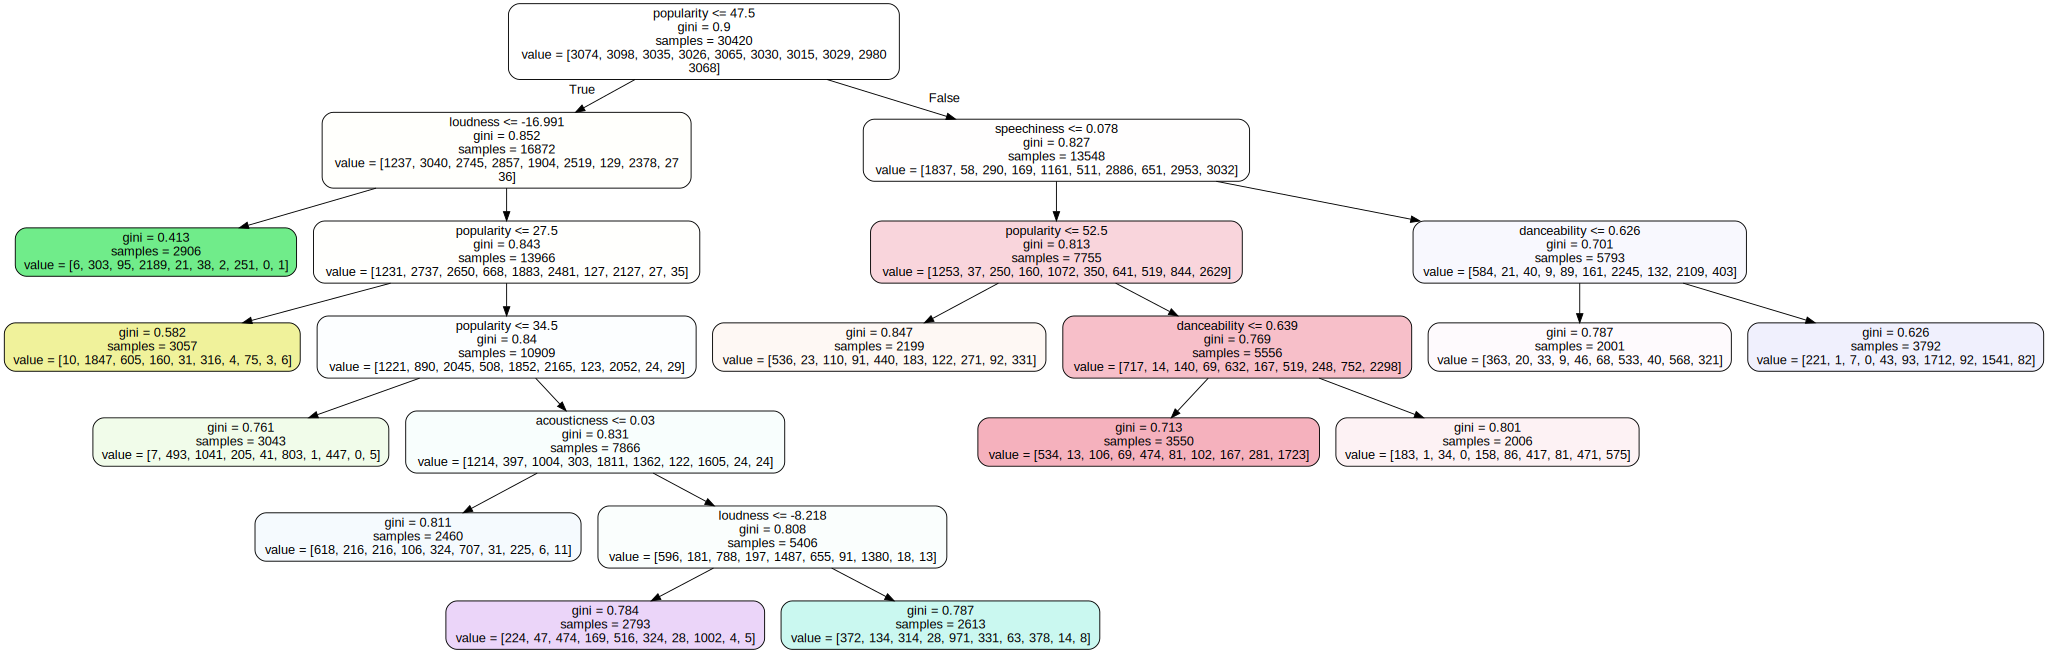

In [ ]:
dot_data = tree.export_graphviz(dt,feature_names=numerical.columns,rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

#### Standardisation

In [ ]:
ss = StandardScaler()

numerical_normalized = ss.fit_transform(numerical)
numerical_normalized = pd.DataFrame(numerical_normalized,columns=numerical.columns)
numerical_normalized.index=target.index

In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=20,min_samples_leaf=2000)
dt.fit(Xtrain,Ytrain)

Y_predicted_normalized=dt.predict(Xtest)
Y_predicted_normalized

array(['Rock', 'Jazz', 'Country', ..., 'Rock', 'Rock', 'Blues'],
      dtype=object)

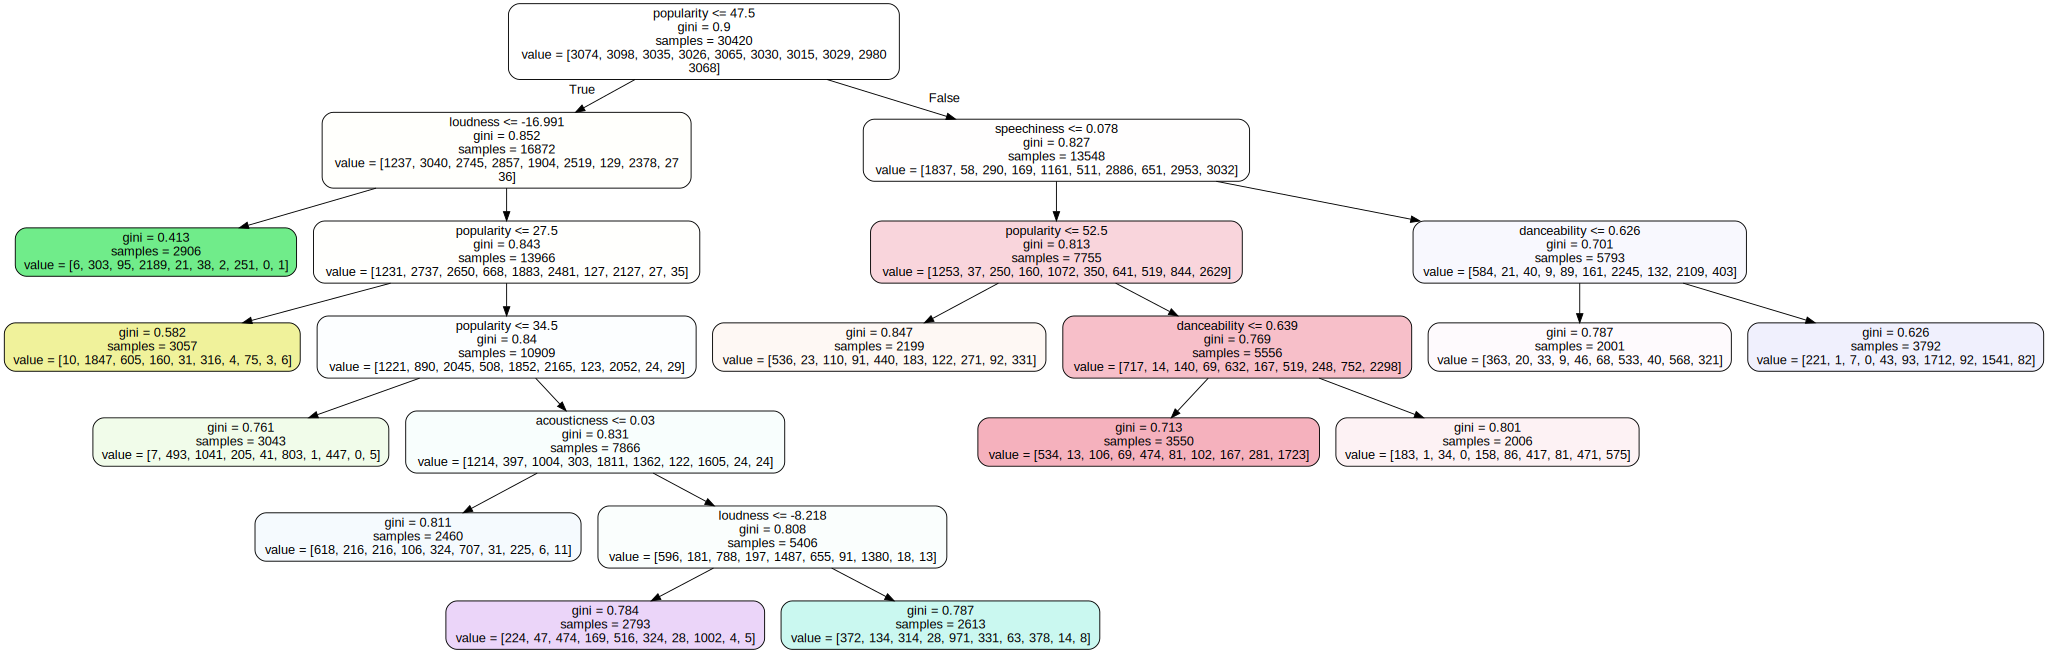

In [ ]:
dot_data = tree.export_graphviz(dt,feature_names=numerical_normalized.columns,rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

#### Understanding the results

In [ ]:
dt_Xtest_results=Xtest.copy()
dt_Xtest_results["music_genre"] = Ytest
dt_Xtest_results["predicted_normalized"] = Y_predicted_normalized

for genre in dt_Xtest_results["music_genre"].unique():
  print('-----------------------------------------------------')
  print("\n Genre de musique prédit :"+genre)
  print("Genre de musique réel :")
  print(dt_Xtest_results.sort_index().loc[dt_Xtest_results["predicted_normalized"]==genre]["music_genre"].value_counts()) #parmis les music preditent, quel etait vraiment leurs vrais genre ?

-----------------------------------------------------

 Genre de musique prédit :Rap
Genre de musique réel :
Rap            203
Hip-Hop        198
Alternative    120
Rock           113
Jazz            23
Country         21
Electronic      20
Blues           14
Anime            4
Classical        1
Name: music_genre, dtype: int64
-----------------------------------------------------

 Genre de musique prédit :Electronic
Genre de musique réel :
Electronic     230
Alternative    182
Country         99
Blues           95
Anime           84
Jazz            55
Classical       37
Hip-Hop         17
Rock             5
Rap              4
Name: music_genre, dtype: int64
-----------------------------------------------------

 Genre de musique prédit :Alternative
Genre de musique réel :
Alternative    180
Country        141
Rock           113
Jazz            87
Hip-Hop         53
Electronic      41
Blues           37
Classical       37
Rap             24
Anime            9
Name: music_genre, dtype

In [ ]:
metrics.accuracy_score(Ytest, Y_predicted_normalized)

0.41173570019723865

By these tables, we can see that the algorithm manages to better differentiate certain genres (Classical, Rap/Hip-Hop, Anime and Rock) than others.

Even if the accuracy score is not very high, we have seen that certain genres of music are well predicted. This score can be explained by the fact that the genres of music are not only limited to the characteristics of the music, but also with an important cultural aspect.

For the linear regression model, we found that the r2 was 19%, and the model was said to cause poor performance.
The accuracy score of the decision tree to predict the music_genre is close to 41%.
In addition to this still quite low accuracy score, we see that the classifier is unable to differentiate certain genres that are similar (rap and hip-hop, for example). At this stage, it is very hard to predict the genre of music with the variables we have in this dataset. Or it is better to reduce the number of classes by grouping genres of music together.

## K-means Clustering

In [ ]:
#'music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence'
music1 = data[['popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']].copy()
music_with_genre = data[['music_genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','speechiness','valence']]

In [ ]:
music1_std = StandardScaler().fit_transform(music1)
km1 = KMeans(n_clusters=3, init="k-means++")
cluster1 = km1.fit_predict(music1_std)

In order to determine the adequate number of clusters, it is first necessary to cluster in a minimum of groups, here 3.

### Réflexion sur le nombre de clusters

In [ ]:
result = []
for i in range(2,20):
  keams = KMeans(n_clusters = i, init='k-means++')
  keams.fit_predict(music1_std)
  result.append(keams.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


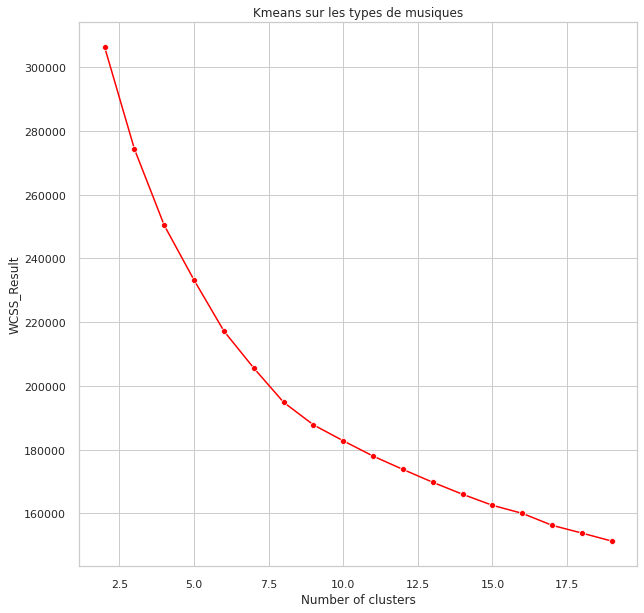

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(range(2,20),result, marker='o',color='red')
plt.title('Kmeans sur les types de musiques')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_Result')
plt.show()

**Elbow method**
WCSS is the sum of the squared distances between each point and the centroid of a cluster. When we plot the WCSS with the K value, the plot looks like an elbow. As the number of clusters increases, the WCSS value begins to decrease. The WCSS value is greatest when K = 1.
We see the number of clusters offered, after 6 clusters we can find wcss more and more diminished. So we can make the second prediction on a number of clusters 6.

From the analysis of the decision tree, we concluded that we can reduce the number of music genres to less than 10, because some genres have very similar characteristics.
Then, the Elbow method tells us that a number of clusters between 6 and 8 is relevant.

### Clustering KMeans into 6 clusters

In [ ]:
music3_std = StandardScaler().fit_transform(music1)
km3 = KMeans(n_clusters=6, init="k-means++")
cluster3 = km3.fit_predict(music3_std)

score = silhouette_score(music3_std,cluster3)
score

0.14510375745376158

**k-means++**
k-means++ is an algorithm for choosing seed values for the k-means clustering algorithm.

**inertia**
measures how well a data set has been clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring that distance, and adding those squares across a cluster.

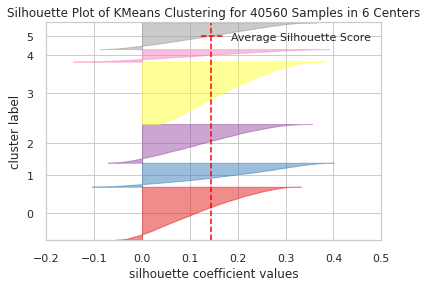

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fca71764650>,
                     estimator=KMeans(n_clusters=6))

In [ ]:
silhouette_visualizer(km3, music3_std)

**Sihouette Score Coefficient**
is a quality measure of a partition of a data set in automatic classification([wikipedia](https://fr.wikipedia.org/wiki/Silhouette_(clustering)))
We look at the clustering score "sihouette coefficient", a score close to 1 indicates a better clustering, on the contrary if the score is close to -1, the clustering is bad. The score close to 0 indicates an overlap between two clusters.

### Analyse du clustering

We want to look at the characteristics of the clusters.

In [ ]:
music1["cluster"]=cluster3 # avec 6 clusters et les moins de variables
music1.groupby("cluster").agg(['mean',"count"])

popularity        acousticness        danceability         \
              mean  count         mean  count         mean  count   
cluster                                                             
0        40.218744   9902     0.072797   9902     0.474757   9902   
1        28.707961   4472     0.927259   4472     0.295777   4472   
2        41.909405   7230     0.612293   7230     0.553919   7230   
3        50.647645  11636     0.142905  11636     0.671165  11636   
4        42.788281   2338     0.217766   2338     0.539403   2338   
5        55.570855   4982     0.189466   4982     0.712574   4982   

           duration_ms           energy         liveness          loudness  \
                  mean  count      mean  count      mean  count       mean   
cluster                                                                      
0        253233.609574   9902  0.795236   9902  0.185393   9902  -5.692658   
1        310225.402281   4472  0.111767   4472  0.148597   4472 -22.632298   
2        232843.452282   7230  0.385213   7230  0.141713   7230 -11.337223   
3        230398.661568  11636  0.711605  11636  0.154972  11636  -6.715275   
4        265612.890932   2338  0.719488   2338  0.680109   2338  -7.424156   
5        216143.749097   4982  0.647859   4982  0.189304   4982  -7.049472   

                     tempo        speechiness          valence         
         count        mean  count        mean  count      mean  count  
cluster                                                                
0         9902  142.190183   9902    0.071610   9902  0.409151   9902  
1         4472  100.430203   4472    0.047148   4472  0.163269   4472  
2         7230  113.429407   7230    0.048917   7230  0.400495   7230  
3        11636  111.839467  11636    0.061089  11636  0.626764  11636  
4         2338  120.762062   2338    0.112142   2338  0.489663   2338  
5         4982  120.678288   4982    0.312205   4982  0.485292   4982

We can observe here the musical characteristics of the 6 clusters. Cluster 1 has very high acousticness, very low energy and very low loudness. We can imagine that it is a cluster bringing together classical music that has similar characteristics.
We also notice cluster 5 which has characteristics close to Rap/Hip-Hop, with high popularity, dancebility and speechiness.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


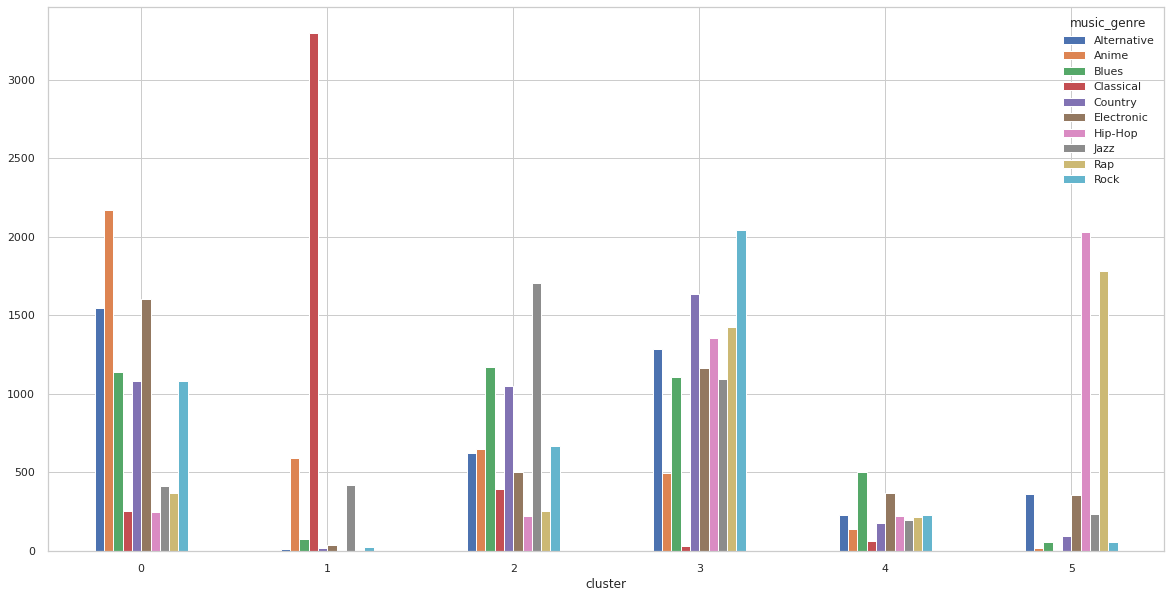

In [ ]:
music_with_genre["cluster"]=cluster3 # avec 6 clusters et moins de variables
music_cagt = music_with_genre.groupby(['cluster','music_genre']).count().unstack()['popularity']
music_cagt.plot(kind="bar", rot=360, xlabel=None, figsize=(20,10))

This graphical representation validates the suggestions made earlier:
- Cluster 5: Rap & Hip-Hop
- Cluster 0: Mainly Anime, Alternative and Electronic
- Cluster 1: Classical
- Cluster 2: Mainly Jazz, Blues and Country

# **Discussion and conclusion**

First thanks to an ACP we were able to determine that the speechiness, danceability and the duration of the music were important so that a music becomes popular.
We then tried to predict it with a linear regression, but we believe that it would be possible to use a more efficient model in order to induce popularity.
We also tried to predict the genre of the music in order to know if it was possible to find it from the characteristics of the music. Our results were quite good because the decision tree manages to differentiate between classical music, rock, Anime and includes Hip-Hop and Rap.
We used the results of the decision tree as well as the WCSS to determine the ideal number of clusters to request from the KMean++ algorithm. This is how we clustered our dataset into 6 clusters. The clustering result is similar to what we expected, we wanted Classical music to be isolated in a cluster, such as Rock and Anime music, and Rap and Hip-Hop to be merged into a cluster.

So, a music genre can be defined as a conventional category that groups pieces of music that share a set of conventions or traditions. Music is divided into different genres using a range of criteria. However, due to the artistic nature of music, classifications are almost always controversial and subjective.

# References
- data ressource : https://www.kaggle.com/
- https://fr.wikipedia.org/
- cours de l'UE INF2481M : Analyse de données